<a href="https://colab.research.google.com/github/Udhay2898/Netflix_EDA/blob/Master/Nertflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading Dataset
df = pd.read_csv('/content/drive/MyDrive/Data Sets/Netflix_title.csv')
df.sample(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6341,s6342,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,"December 3, 2018",2017,TV-G,1 Season,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...
3770,s3771,TV Show,Tales of the City,NaN,"Laura Linney, Ellen Page, Olympia Dukakis, Pau...",United States,"June 7, 2019",2019,TV-MA,1 Season,TV Dramas,Returning to San Francisco after a long absenc...
8516,s8517,Movie,The Spy Who Fell to Earth,Thomas Meadmore,NaN,United Kingdom,"April 5, 2019",2019,TV-MA,94 min,"Documentaries, International Movies","Based on Dr. Ahron Bregman's book, this docume..."


In [ ]:
# Exploring Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
# Dropping unnecessary columns
df.drop(['show_id', 'description'], axis=1, inplace=True)

In [ ]:
df.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [ ]:
# Checking duplicates
df.duplicated().sum()

0

In [ ]:
# Checking missing values

df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [ ]:
# Data Cleaning

df.fillna({'cast':'NA'}, inplace=True)
df.fillna({'director':'Na'},inplace=True)
df.fillna({'country':'-'},inplace=True)
df.fillna({'rating':'-'},inplace=True)
df.fillna({'duration':'-'},inplace=True)
df.fillna({'date_added':'-'},inplace=True)

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# Data Transformation
df.rename(columns={"listed_in":"categories"},inplace=True)

In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,categories,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Na,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,categories,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September


In [ ]:
# Data Visualization

df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

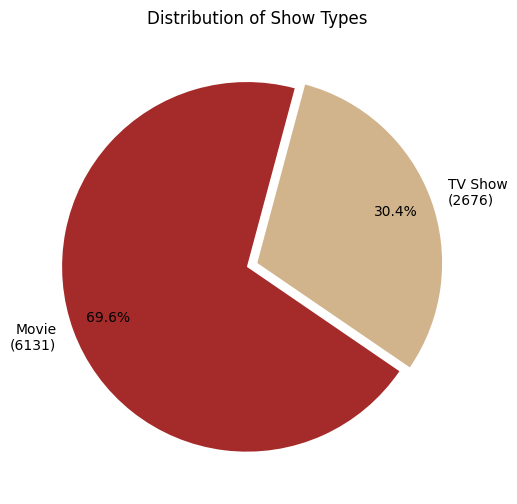

In [ ]:
type_counts=df['type'].value_counts()

type_index=type_counts.index

# Create labels with counts
labels_with_counts = [f'{label}\n({count})' for label, count in zip(type_index, type_counts)]

colors = ["#A52A2A","#D2B48C"]

plt.figure(figsize=(8, 6))
plt.pie(type_counts, labels = labels_with_counts, autopct='%1.1f%%', startangle= 75, colors = colors,explode = (0.06, 0), pctdistance = 0.8)
plt.title('Distribution of Show Types')

plt.show()


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'categories', 'description',
       'year_added', 'month_added'],
      dtype='object')

In [ ]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', '-',
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
rating_gr = df.groupby(['rating', 'type']).size().reset_index(name='count')

exclude_ratings = ['74 min', '84 min', '66 min', '-','TV-Y7-FV']

rating_gr = rating_gr[~rating_gr['rating'].isin(exclude_ratings)]

rating_gr_pivot = rating_gr.pivot_table(index='rating', columns='type', values='count', fill_value=0)

rating_gr_pivot.head(10)

type,Movie,TV Show
rating,,
G,41.0,0.0
NC-17,2.0,0.0
NR,75.0,0.0
PG,286.0,0.0
PG-13,489.0,0.0
R,794.0,1.0
TV-14,1393.0,64.0
TV-G,114.0,4.0
TV-MA,1993.0,124.0


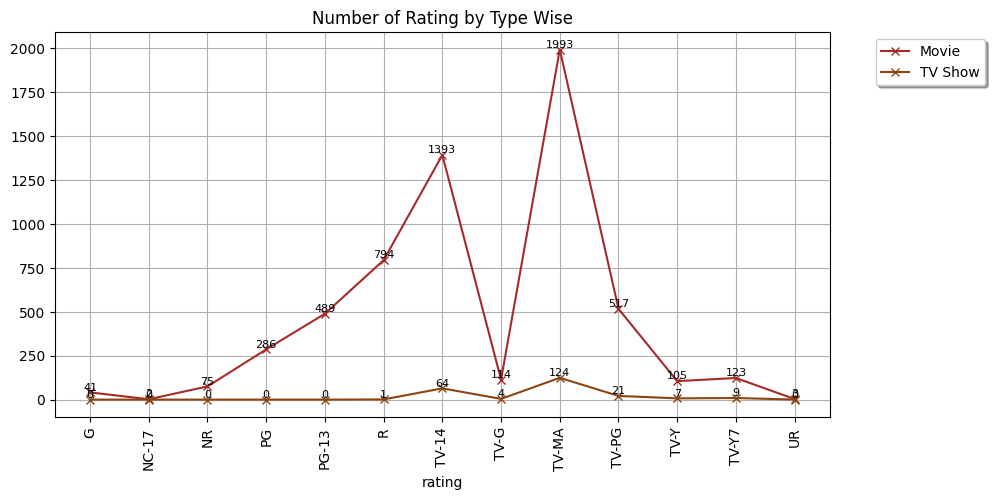

In [ ]:
ax = rating_gr_pivot.plot.line(figsize=(10, 5), marker='x', grid=True, color=colors)

# Add data labels
for line in ax.get_lines():
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for x, y in zip(x_data, y_data):
        ax.text(
            x,                             # X position
            y + 0.1,                       # Y position (just above the line)
            f'{int(y)}',                  # Label text
            ha='center',                  # Horizontal alignment
            va='bottom',                  # Vertical alignment
            fontsize=8,                  # Font size
            rotation=0,                   # Rotate text by 90 degrees
            color = '#000000'             #Color
        )

# Customize x-ticks
tick = range(len(rating_gr_pivot))
plt.xticks(ticks=tick, labels=rating_gr_pivot.index, rotation=90)

# Add legend and title
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fancybox=True, shadow=True)
plt.title('Number of Rating by Type Wise')

# Show plot
plt.show()

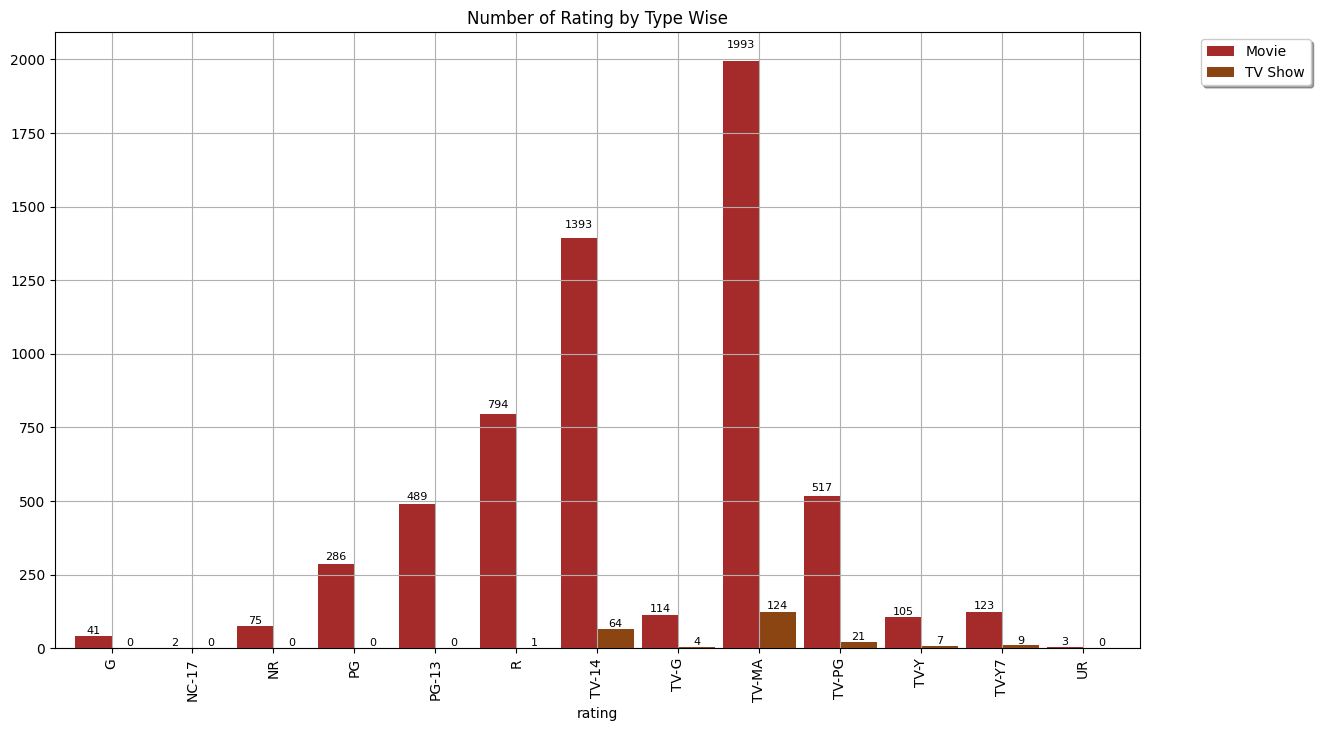

In [ ]:
bar_width = 0.9

ax = rating_gr_pivot.plot.bar(figsize=(14, 8), grid=True, color=colors, width=bar_width)

# Add data labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        label = f'{int(height)}'
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position
            height + 0.02 * height,             # Y position (slightly above the bar)
            label,                              # Label text
            ha='center',                        # Horizontal alignment
            va='bottom',                        # Vertical alignment
            fontsize=8,                        # Font size
            rotation = 0                         # Rotate text by 90 degrees
        )

# Customize x-ticks
tick = range(len(rating_gr_pivot))
plt.xticks(ticks=tick, labels=rating_gr_pivot.index, rotation=90)

# Add legend and title
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fancybox=True, shadow=True)
plt.title('Number of Rating by Type Wise')

# Show plot
plt.show()

In [ ]:
top_director = df[df['director'] != 'Na']

top_director = df['director'].value_counts().reset_index()
top_director.columns = ['director', 'count']

top_director = top_director.nlargest(10, 'count')

top_director

,director,count
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Suhas Kadav,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Martin Scorsese,12
7,Youssef Chahine,12
8,Jay Chapman,12
9,Steven Spielberg,11


In [ ]:
fig = px.pie(top_director, values='count', names='director', title='Top Directors and Their Contribution',
             hole=0.3, labels={'count': 'Director Count'}, color_discrete_sequence=colors)

fig.update_layout(height=600, width=800, title_x=0.5)

fig.show()

In [ ]:
release_year = df['release_year'].value_counts().sort_index()
release_year

release_year
1942      2
1943      3
1944      3
1945      3
1946      2
       ... 
2017    773
2018    760
2019    629
2020    548
2021    297
Name: count, Length: 73, dtype: int64

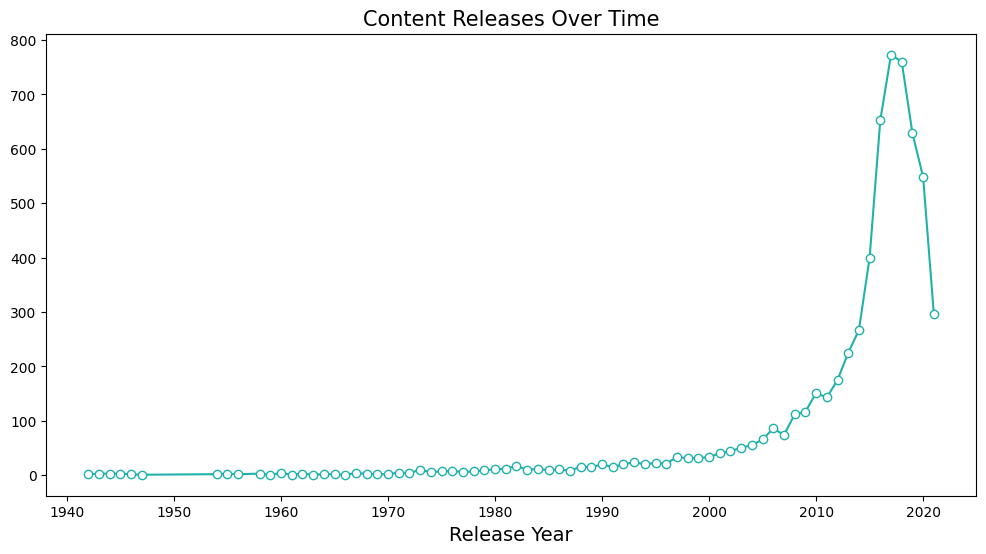

In [ ]:
release_year.plot.line( marker='o', markerfacecolor='#Ffffff', color='#20B2AA', figsize=(12, 6))

plt.title('Content Releases Over Time',fontsize=15)
plt.xlabel('Release Year',fontsize=14)
plt.show()

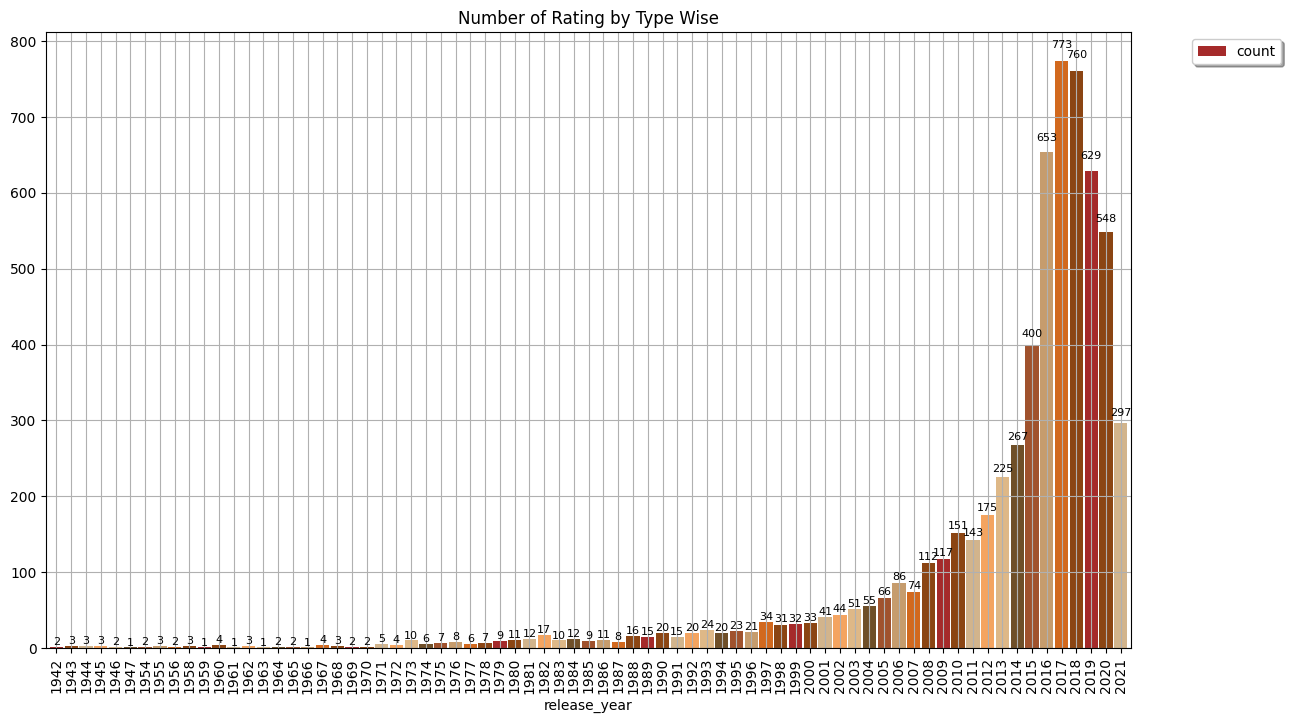

In [ ]:
bar_width = 0.9

ax = release_year.plot.bar(figsize=(14, 8), grid=True, color=colors, width=bar_width)

# Add data labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        label = f'{int(height)}'
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position
            height + 0.02 * height,             # Y position (slightly above the bar)
            label,                              # Label text
            ha='center',                        # Horizontal alignment
            va='bottom',                        # Vertical alignment
            fontsize=8,                        # Font size
            rotation = 0                         # Rotate text by 90 degrees
        )

# Customize x-ticks
tick = range(len(release_year))
plt.xticks(ticks=tick, labels=release_year.index, rotation=90)

# Add legend and title
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fancybox=True, shadow=True)
plt.title('Number of Rating by Type Wise')

# Show plot
plt.show()

In [ ]:
# Extract and count the top 10 genres
top_genres = df['categories'].str.split(', ', expand=True).stack().value_counts().reset_index()

top_genres.columns = ['genre', 'count']
top_genres = top_genres.nlargest(10, 'count')

top_genres

,genre,count
0,International Movies,2705
1,Dramas,2402
2,Comedies,1642
3,Action & Adventure,851
4,Documentaries,812
5,Independent Movies,751
6,Romantic Movies,605
7,Children & Family Movies,605
8,Thrillers,575
9,Music & Musicals,358


In [ ]:
# Create a tree map with Plotly
fig = px.treemap(top_genres, path=['genre'], values='count',
                 title='Tree Map of Genre Counts',
                 color='count',
                 color_continuous_scale=colors)

fig.update_layout(
    autosize=False,
    width=600,   # Width of the chart
    height=600,  # Height of the chart (same as width for square aspect ratio)
    title_x=0.5  # Center the title
)
fig.show()

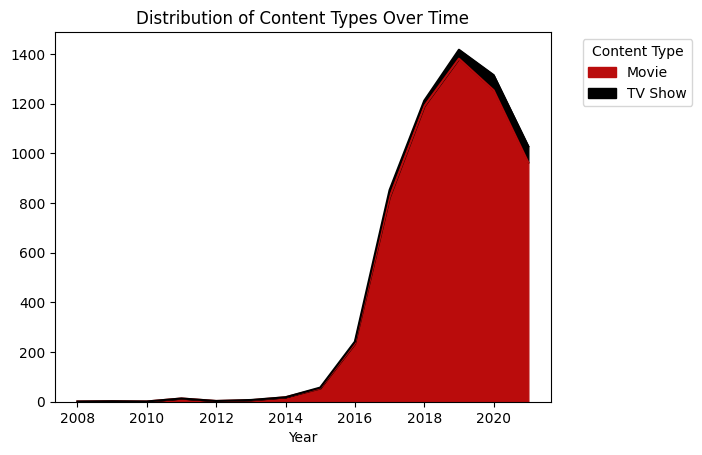

In [ ]:
content_type_distribution = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

colors = ['#ba0c0c','#000000']
content_type_distribution.plot.area(stacked=True, color= colors)

plt.title('Distribution of Content Types Over Time')
plt.xlabel('Year')
plt.legend(title='Content Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
top_country = df[df['country'] != '-']['country'].value_counts()

top_country.head(10)

country
United States     2048
India              890
United Kingdom     212
Canada             119
Spain              106
Nigeria             90
Egypt               90
Japan               85
France              81
Turkey              79
Name: count, dtype: int64

NameError: name 'country_name' is not defined